In [75]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
df_inputs=pd.read_csv("C:/Users/Tress/OneDrive/Desktop/Learn/Dataset/traininginputs.csv")
df_output=pd.read_csv("C:/Users/Tress/OneDrive/Desktop/Learn/Dataset/trainingoutput.csv")

In [79]:
df_inputs.drop('PROC_TRACEINFO',axis=1,inplace=True)

In [103]:
df_test=pd.read_csv("C:/Users/Tress/OneDrive/Desktop/Learn/Dataset/testinputs.csv")

In [78]:
df_test.drop('PROC_TRACEINFO',axis=1,inplace=True)
df_test

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,162.8,164.40,150.7,119.51,11.88,12.29,NaN,11.97,6.61,23.99,17.9,92.45,6.60
1,122.8,177.09,145.5,118.82,12.07,12.27,NaN,11.97,6.62,25.35,21.4,104.67,6.61
2,189.6,164.47,186.7,110.46,11.85,12.25,NaN,11.97,6.64,27.49,17.3,103.39,6.60
3,141.8,161.14,169.9,113.20,12.07,12.24,NaN,11.98,6.62,23.71,16.5,99.84,6.60
4,155.1,165.67,166.1,112.58,11.84,12.18,NaN,11.97,6.61,27.38,21.5,102.64,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,149.2,135.67,149.8,110.09,12.11,12.26,0.41,11.97,6.40,22.05,15.0,100.87,6.40
7997,158.0,164.30,178.6,113.61,11.90,12.27,NaN,11.97,6.62,20.74,15.5,86.97,6.61
7998,164.7,183.57,193.8,109.40,12.06,12.26,NaN,11.97,6.61,26.16,40.2,106.29,6.60
7999,165.4,145.71,156.5,108.25,11.85,12.25,NaN,11.97,6.61,27.18,18.4,98.60,6.63


In [29]:
df_inputs.describe()
df_inputs.head()


,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [4]:
x=df_inputs['PROC_TRACEINFO'].str.split(pat='-',expand=True).iloc[:,3:5]
df_inputs['Date']=pd.to_datetime("20"+ x.iloc[:,0].str.slice(0,6))
df_inputs['Batch_ID']=x.iloc[:,1]
df_inputs.drop('PROC_TRACEINFO',axis=1,inplace=True)
df_inputs.head()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Date,Batch_ID
0,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,2019-04-29,00688
1,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,2019-08-28,00973
2,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,2019-07-12,03462
3,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,2019-08-03,00051
4,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,2019-05-08,03248


#### Examine the class label imbalance

In [80]:
df_output['Binar OP130_Resultat_Global_v'].value_counts()/34515

0    0.991163
1    0.008837
Name: Binar OP130_Resultat_Global_v, dtype: float64

In [81]:
df_output['Binar OP130_Resultat_Global_v'].value_counts()

0    34210
1      305
Name: Binar OP130_Resultat_Global_v, dtype: int64

In [82]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      34515 non-null  float64
 8   OP070_V_1_torque_value           34515 non-null  float64
 9   OP090_StartLinePeakForce_value   34515 non-null  float64
 10  OP110_Vissage_M8_angle_value     34515 non-null  float64
 11  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 12  OP070_V_2_torque_v

In [83]:
df_inputs.isna().sum()

OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
dtype: int64

In [84]:
from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=3, weights='distance')
df=pd.DataFrame(knnimputer.fit_transform(df_inputs))

In [85]:
df_tst=pd.DataFrame(knnimputer.transform(df_test))
df_tst.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,162.8,164.40,150.7,119.51,11.88,12.29,0.381057,11.97,6.61,23.99,17.9,92.45,6.60
1,122.8,177.09,145.5,118.82,12.07,12.27,0.375910,11.97,6.62,25.35,21.4,104.67,6.61
2,189.6,164.47,186.7,110.46,11.85,12.25,0.372589,11.97,6.64,27.49,17.3,103.39,6.60
3,141.8,161.14,169.9,113.20,12.07,12.24,0.377024,11.98,6.62,23.71,16.5,99.84,6.60
4,155.1,165.67,166.1,112.58,11.84,12.18,0.380329,11.97,6.61,27.38,21.5,102.64,6.60


In [9]:
#df['Batch_ID']=df_inputs['Batch_ID']

In [86]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,180.4,190.51,173.1,113.64,12.04,12.16,0.366577,11.97,6.62,26.37,18.8,109.62,6.60
1,138.7,147.70,163.5,109.77,12.12,12.19,0.390000,11.97,6.41,21.03,18.5,105.48,6.40
2,180.9,150.87,181.2,109.79,11.86,12.24,0.398891,11.97,6.62,25.81,17.5,100.03,6.61
3,173.5,159.56,151.8,113.25,11.82,12.35,0.390000,11.97,6.62,24.62,15.6,104.94,6.61
4,174.5,172.29,177.5,112.88,12.07,12.19,0.386530,11.97,6.62,29.22,33.6,99.19,6.61


In [87]:
train_df, val_df = train_test_split(df, test_size=0.2)

In [88]:
# Form np arrays of labels and features.
train_labels = np.array(df_output.iloc[train_df.index]['Binar OP130_Resultat_Global_v'])
bool_train_labels = train_labels != 0
val_labels = np.array(df_output.iloc[val_df.index]['Binar OP130_Resultat_Global_v'])

In [90]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(df_tst)

In [42]:
print(train_features.shape)
val_features.shape

(27612, 13)


(6903, 13)

In [91]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

In [52]:
df['Defect']=df_output['Binar OP130_Resultat_Global_v']

<AxesSubplot:ylabel='Density'>

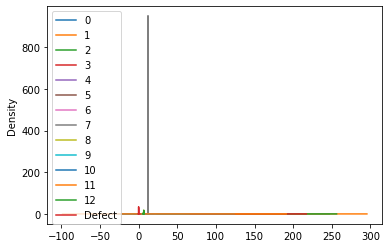

In [53]:
df.plot.kde()

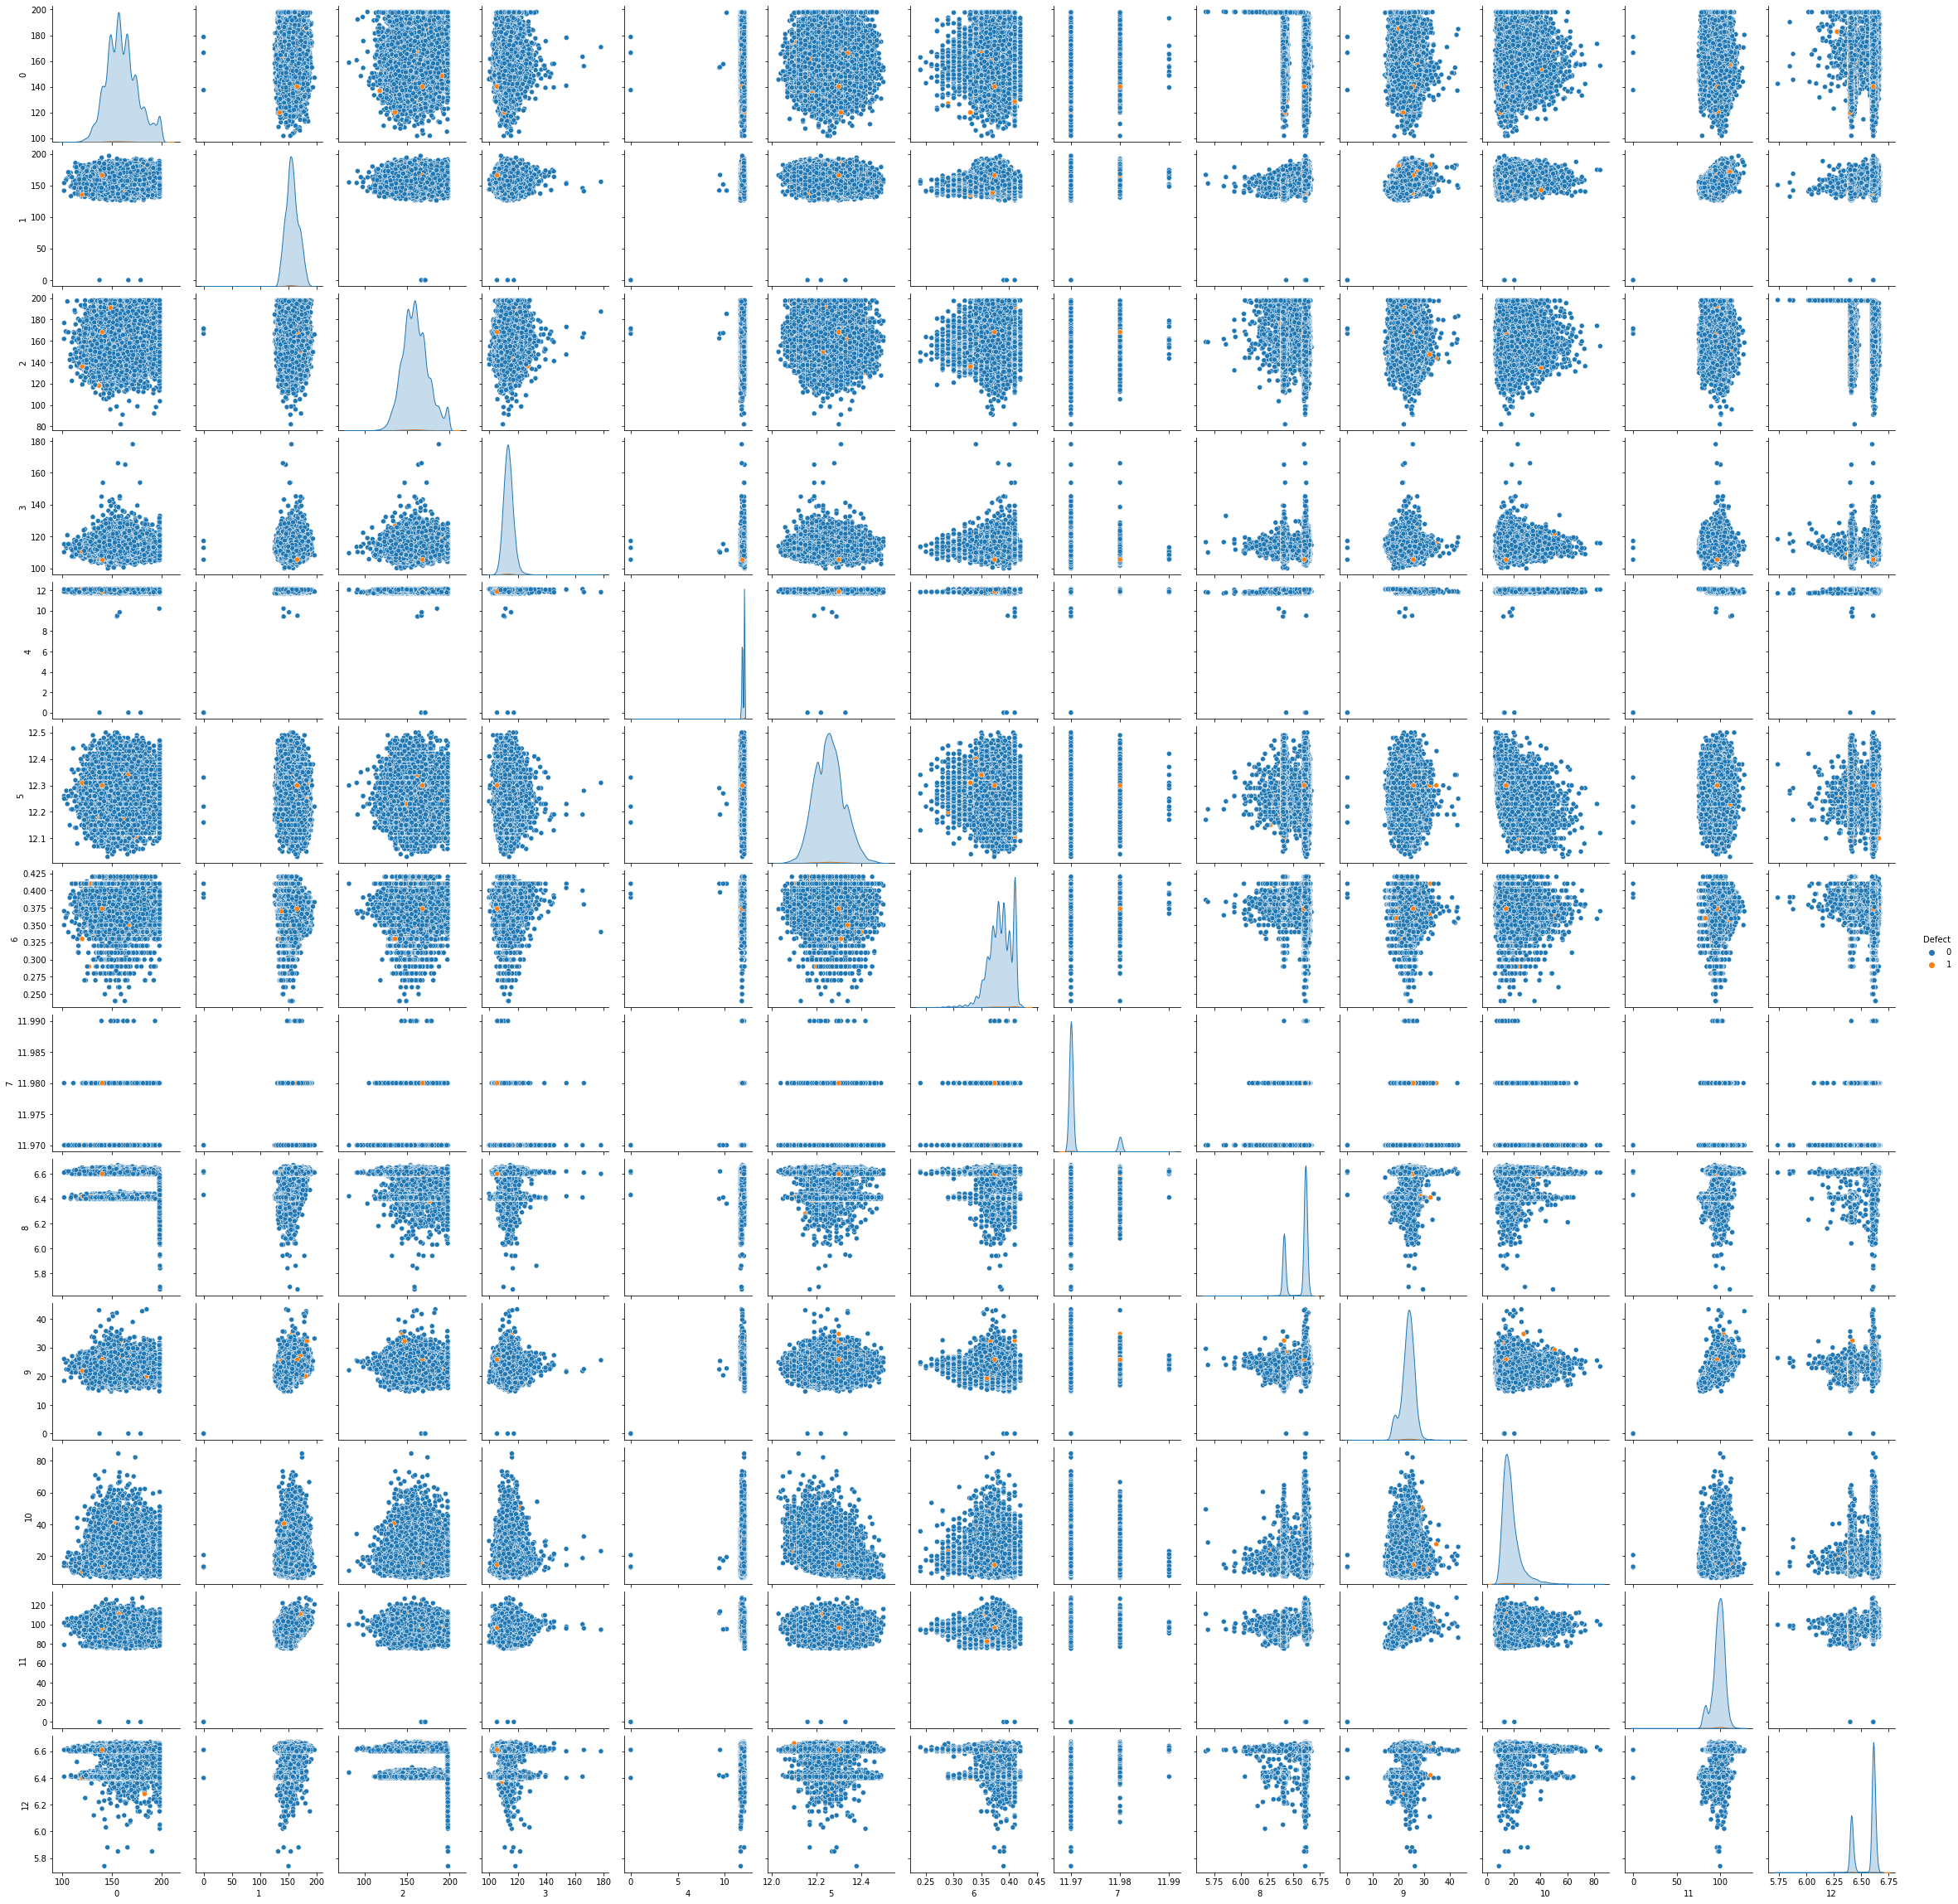

In [21]:
sns.pairplot(data=df,hue='Defect')

In [94]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [86]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc',num_thresholds=3, curve='ROC')
]

In [87]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          32, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [88]:
EPOCHS = 50
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [89]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.predict(train_features[:20])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [104]:
pd.DataFrame(train_labels).value_counts()

0    27372
1      240
dtype: int64

In [105]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6001


In [106]:
initial_bias = np.log([305/34210])
initial_bias

array([-4.7199615])

In [107]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.00335175],
       [0.00843611],
       [0.00389102],
       [0.00690454],
       [0.00414252],
       [0.00410509],
       [0.00390288],
       [0.00684828],
       [0.01332778],
       [0.00589707]], dtype=float32)

In [108]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0509


In [109]:
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/50
14/14 [==============================] - 2s 9ms/step - loss: 0.0528 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27372.0000 - fn: 240.0000 - accuracy: 0.9913 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0538 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6838.0000 - val_fn: 65.0000 - val_accuracy: 0.9906 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0514 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27372.0000 - fn: 240.0000 - accuracy: 0.9913 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0534 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6838.0000 - val_fn: 65.0000 - val_accuracy: 0.9906 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0519 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27372.0000 - fn: 240.0000 - accuracy: 0.9913 - pr

Epoch 21/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0487 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27372.0000 - fn: 240.0000 - accuracy: 0.9913 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0520 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6838.0000 - val_fn: 65.0000 - val_accuracy: 0.9906 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping


In [110]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)

In [111]:
cm = confusion_matrix(train_labels, train_predictions_baseline > 0.5)
cm

array([[27372,     0],
       [  240,     0]], dtype=int64)

In [71]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
neg=34210
pos=305
total=neg+pos
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 56.58


In [72]:
weighted_model = make_model()

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
14/14 [==============================] - 3s 64ms/step - loss: 0.9514 - tp: 11.6000 - fp: 889.2667 - tn: 21923.8000 - fn: 184.4667 - accuracy: 0.9572 - precision: 0.0129 - recall: 0.0539 - auc: 0.5094 - val_loss: 0.2870 - val_tp: 1.0000 - val_fp: 77.0000 - val_tn: 6772.0000 - val_fn: 53.0000 - val_accuracy: 0.9812 - val_precision: 0.0128 - val_recall: 0.0185 - val_auc: 0.5036
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.8932 - tp: 19.6000 - fp: 1368.3333 - tn: 14590.6667 - fn: 127.5333 - accuracy: 0.9094 - precision: 0.0157 - recall: 0.1422 - auc: 0.5294 - val_loss: 0.3352 - val_tp: 2.0000 - val_fp: 236.0000 - val_tn: 6613.0000 - val_fn: 52.0000 - val_accuracy: 0.9583 - val_precision: 0.0084 - val_recall: 0.0370 - val_auc: 0.5013
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8874 - tp: 23.0667 - fp: 2000.5333 - tn: 13959.8000 - fn: 122.7333 - accuracy: 0.8712 - precision: 0.0108 - recall: 0.1472 - auc: 0.5124 - val_l

Epoch 22/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7179 - tp: 67.7333 - fp: 5222.8667 - tn: 10737.8000 - fn: 77.7333 - accuracy: 0.6693 - precision: 0.0126 - recall: 0.4757 - auc: 0.5734 - val_loss: 0.6090 - val_tp: 28.0000 - val_fp: 1947.0000 - val_tn: 4902.0000 - val_fn: 26.0000 - val_accuracy: 0.7142 - val_precision: 0.0142 - val_recall: 0.5185 - val_auc: 0.6171
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6948 - tp: 72.1333 - fp: 5358.3333 - tn: 10603.0667 - fn: 72.6000 - accuracy: 0.6617 - precision: 0.0128 - recall: 0.4959 - auc: 0.5795 - val_loss: 0.6092 - val_tp: 28.0000 - val_fp: 1952.0000 - val_tn: 4897.0000 - val_fn: 26.0000 - val_accuracy: 0.7135 - val_precision: 0.0141 - val_recall: 0.5185 - val_auc: 0.6168
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping


In [73]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
cm_weighted = confusion_matrix(train_labels, train_predictions_weighted > 0.5)
cm_weighted

array([[20337,  7024],
       [  131,   120]], dtype=int64)

In [74]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

loss :  0.5895779728889465
tp :  28.0
fp :  1811.0
tn :  5038.0
fn :  26.0
accuracy :  0.733883798122406
precision :  0.0152256665751338
recall :  0.5185185074806213
auc :  0.6270501613616943



In [95]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [96]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(27368, 13)

In [97]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(54736, 13)

In [115]:
resampled_model = make_model()

In [116]:
resampled_history = resampled_model.fit(
    resampled_features,
    resampled_labels,
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/500
20/20 [==============================] - 4s 62ms/step - loss: 0.8644 - tp: 3630.0476 - fp: 3789.0476 - tn: 18001.1429 - fn: 11468.8571 - accuracy: 0.6156 - precision: 0.4811 - recall: 0.2262 - auc: 0.5351 - val_loss: 0.5446 - val_tp: 17.0000 - val_fp: 1485.0000 - val_tn: 5353.0000 - val_fn: 48.0000 - val_accuracy: 0.7779 - val_precision: 0.0113 - val_recall: 0.2615 - val_auc: 0.5222
Epoch 2/500
20/20 [==============================] - 0s 19ms/step - loss: 0.7763 - tp: 5907.0476 - fp: 5315.2857 - tn: 9701.5714 - fn: 9062.1905 - accuracy: 0.5186 - precision: 0.5225 - recall: 0.3833 - auc: 0.5180 - val_loss: 0.6170 - val_tp: 29.0000 - val_fp: 2113.0000 - val_tn: 4725.0000 - val_fn: 36.0000 - val_accuracy: 0.6887 - val_precision: 0.0135 - val_recall: 0.4462 - val_auc: 0.5686
Epoch 3/500
20/20 [==============================] - 0s 17ms/step - loss: 0.7393 - tp: 7189.9048 - fp: 5968.6190 - tn: 8997.8571 - fn: 7829.7143 - accuracy: 0.5390 - precision: 0.5458 - recall: 0.4746 - auc

Epoch 22/500
20/20 [==============================] - 0s 19ms/step - loss: 0.6346 - tp: 9396.0476 - fp: 4902.3333 - tn: 10067.4762 - fn: 5620.2381 - accuracy: 0.6490 - precision: 0.6580 - recall: 0.6261 - auc: 0.6491 - val_loss: 0.6080 - val_tp: 32.0000 - val_fp: 2051.0000 - val_tn: 4787.0000 - val_fn: 33.0000 - val_accuracy: 0.6981 - val_precision: 0.0154 - val_recall: 0.4923 - val_auc: 0.5962
Epoch 23/500
20/20 [==============================] - 0s 19ms/step - loss: 0.6302 - tp: 9504.0000 - fp: 4920.5238 - tn: 10017.9048 - fn: 5543.6667 - accuracy: 0.6508 - precision: 0.6604 - recall: 0.6308 - auc: 0.6510 - val_loss: 0.6111 - val_tp: 33.0000 - val_fp: 2084.0000 - val_tn: 4754.0000 - val_fn: 32.0000 - val_accuracy: 0.6935 - val_precision: 0.0156 - val_recall: 0.5077 - val_auc: 0.6015
Epoch 24/500
20/20 [==============================] - 0s 18ms/step - loss: 0.6306 - tp: 9539.7619 - fp: 4933.0952 - tn: 10041.7619 - fn: 5471.4762 - accuracy: 0.6532 - precision: 0.6595 - recall: 0.6358 -

Epoch 43/500
20/20 [==============================] - 0s 18ms/step - loss: 0.6217 - tp: 10160.7143 - fp: 5138.8571 - tn: 9821.0952 - fn: 4865.4286 - accuracy: 0.6650 - precision: 0.6636 - recall: 0.6748 - auc: 0.6650 - val_loss: 0.6010 - val_tp: 33.0000 - val_fp: 2165.0000 - val_tn: 4673.0000 - val_fn: 32.0000 - val_accuracy: 0.6817 - val_precision: 0.0150 - val_recall: 0.5077 - val_auc: 0.5955
Epoch 44/500
20/20 [==============================] - 0s 19ms/step - loss: 0.6217 - tp: 10063.2857 - fp: 5093.3333 - tn: 9902.9048 - fn: 4926.5714 - accuracy: 0.6650 - precision: 0.6626 - recall: 0.6709 - auc: 0.6650 - val_loss: 0.6008 - val_tp: 33.0000 - val_fp: 2176.0000 - val_tn: 4662.0000 - val_fn: 32.0000 - val_accuracy: 0.6801 - val_precision: 0.0149 - val_recall: 0.5077 - val_auc: 0.5947
Epoch 45/500
20/20 [==============================] - 0s 22ms/step - loss: 0.6192 - tp: 10218.2381 - fp: 5146.9048 - tn: 9822.8095 - fn: 4798.1429 - accuracy: 0.6692 - precision: 0.6665 - recall: 0.6803 -

In [117]:
val_predictions_os = resampled_model.predict(val_features, batch_size=BATCH_SIZE)
val_y=val_predictions_os>.5

In [118]:
sklearn.metrics.roc_auc_score(val_labels, val_y)

0.6024129862532904

In [27]:
resampled_features

array([[ 0.35405635, -0.47399634, -0.82596075, ..., -2.373415  ,
        -1.38078268, -1.27437267],
       [ 0.70595725, -0.60111983, -0.38160561, ..., -0.57278198,
        -1.59179232, -0.23544928],
       [ 0.64837347, -0.38243186, -0.27549095, ...,  0.64477493,
        -1.4862875 , -0.85897252],
       ...,
       [-0.54808961, -0.47844121,  0.14233553, ...,  0.23059996,
        -1.16977304, -0.67707632],
       [-0.27296708, -0.04817708,  0.34793269, ...,  1.24106939,
         0.6238089 ,  1.87116248],
       [ 0.97468158, -0.53266872,  0.51373685, ...,  0.21738161,
        -1.4862875 , -0.19991607]])

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(resampled_features, resampled_labels).predict(val_features)
sklearn.metrics.roc_auc_score(val_labels, y_pred)

0.6019618460712763

In [59]:
#RFE Method
from sklearn.feature_selection import RFE
in_vars=list(resampled_features)[1:12]
gbmclf=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1, random_state=0)
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    rfe_selector = RFE(gbmclf,n_features_to_select=nof_list[n])
    X_train_rfe = rfe_selector.fit_transform(resampled_features, resampled_labels)
    X_test_rfe = rfe_selector.transform(val_features)
    gbmclf.fit(X_train_rfe,resampled_labels)
    score = gbmclf.score(X_test_rfe,val_labels)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.714617


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
gbmclf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1, random_state=0)
rfe_selector = RFE(gbmclf,n_features_to_select=8)
X_train_rfe = rfe_selector.fit_transform(resampled_features, resampled_labels)
X_test_rfe = rfe_selector.transform(val_features)
gbmclf.fit(X_train_rfe,resampled_labels)
y_pred = gbmclf.predict(X_test_rfe)
sklearn.metrics.roc_auc_score(val_labels, y_pred)

0.625566055366804

In [112]:
X_test_rfe = rfe_selector.transform(test_features)
test_y= gbmclf.predict(X_test_rfe)

In [118]:
test_out=df_test
test_out['Binar_OP130_Resultat_Global_v']=pd.DataFrame(test_y)
test_out.drop(['OP070_V_1_angle_value','OP090_SnapRingPeakForce_value','OP070_V_2_angle_value','OP120_Rodage_I_mesure_value','OP090_SnapRingFinalStroke_value','OP110_Vissage_M8_torque_value','OP100_Capuchon_insertion_mesure','OP120_Rodage_U_mesure_value','OP070_V_1_torque_value','OP090_StartLinePeakForce_value','OP110_Vissage_M8_angle_value','OP090_SnapRingMidPointForce_val','OP070_V_2_torque_value'],axis=1,inplace=True)
test_out.head()

,PROC_TRACEINFO,Binar_OP130_Resultat_Global_v
0,I-B-XA1207672-190520-00632,0
1,I-B-XA1207672-190508-03689,1
2,I-B-XA1207672-190715-00577,0
3,I-B-XA1207672-190503-00796,0
4,I-B-XA1207672-190712-01837,0


In [121]:
test_out['Binar_OP130_Resultat_Global_v'].value_counts()
#test_out.to_csv("Test_Out")

0    5781
1    2220
Name: Binar_OP130_Resultat_Global_v, dtype: int64

In [26]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective="binary:logistic",eval_metric='auc', alpha =0.1,random_state=0).fit(resampled_features, resampled_labels)
y_pred = xgb_clf.predict(val_features)
sklearn.metrics.roc_auc_score(val_labels, y_pred)

C:\Users\Tress\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4985399328369105

In [64]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(train_features, train_labels)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
gbmclf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1, random_state=0)
rfe_selector = RFE(gbmclf,n_features_to_select=8)
X_train_rfe = rfe_selector.fit_transform(X, y)
X_test_rfe = rfe_selector.transform(val_features)
gbmclf.fit(X_train_rfe,y)
y_pred = gbmclf.predict(X_test_rfe)
sklearn.metrics.roc_auc_score(val_labels, y_pred)

0.5684008905112417

In [54]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.
